In [1]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# I. 실습용 데이터

In [3]:
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


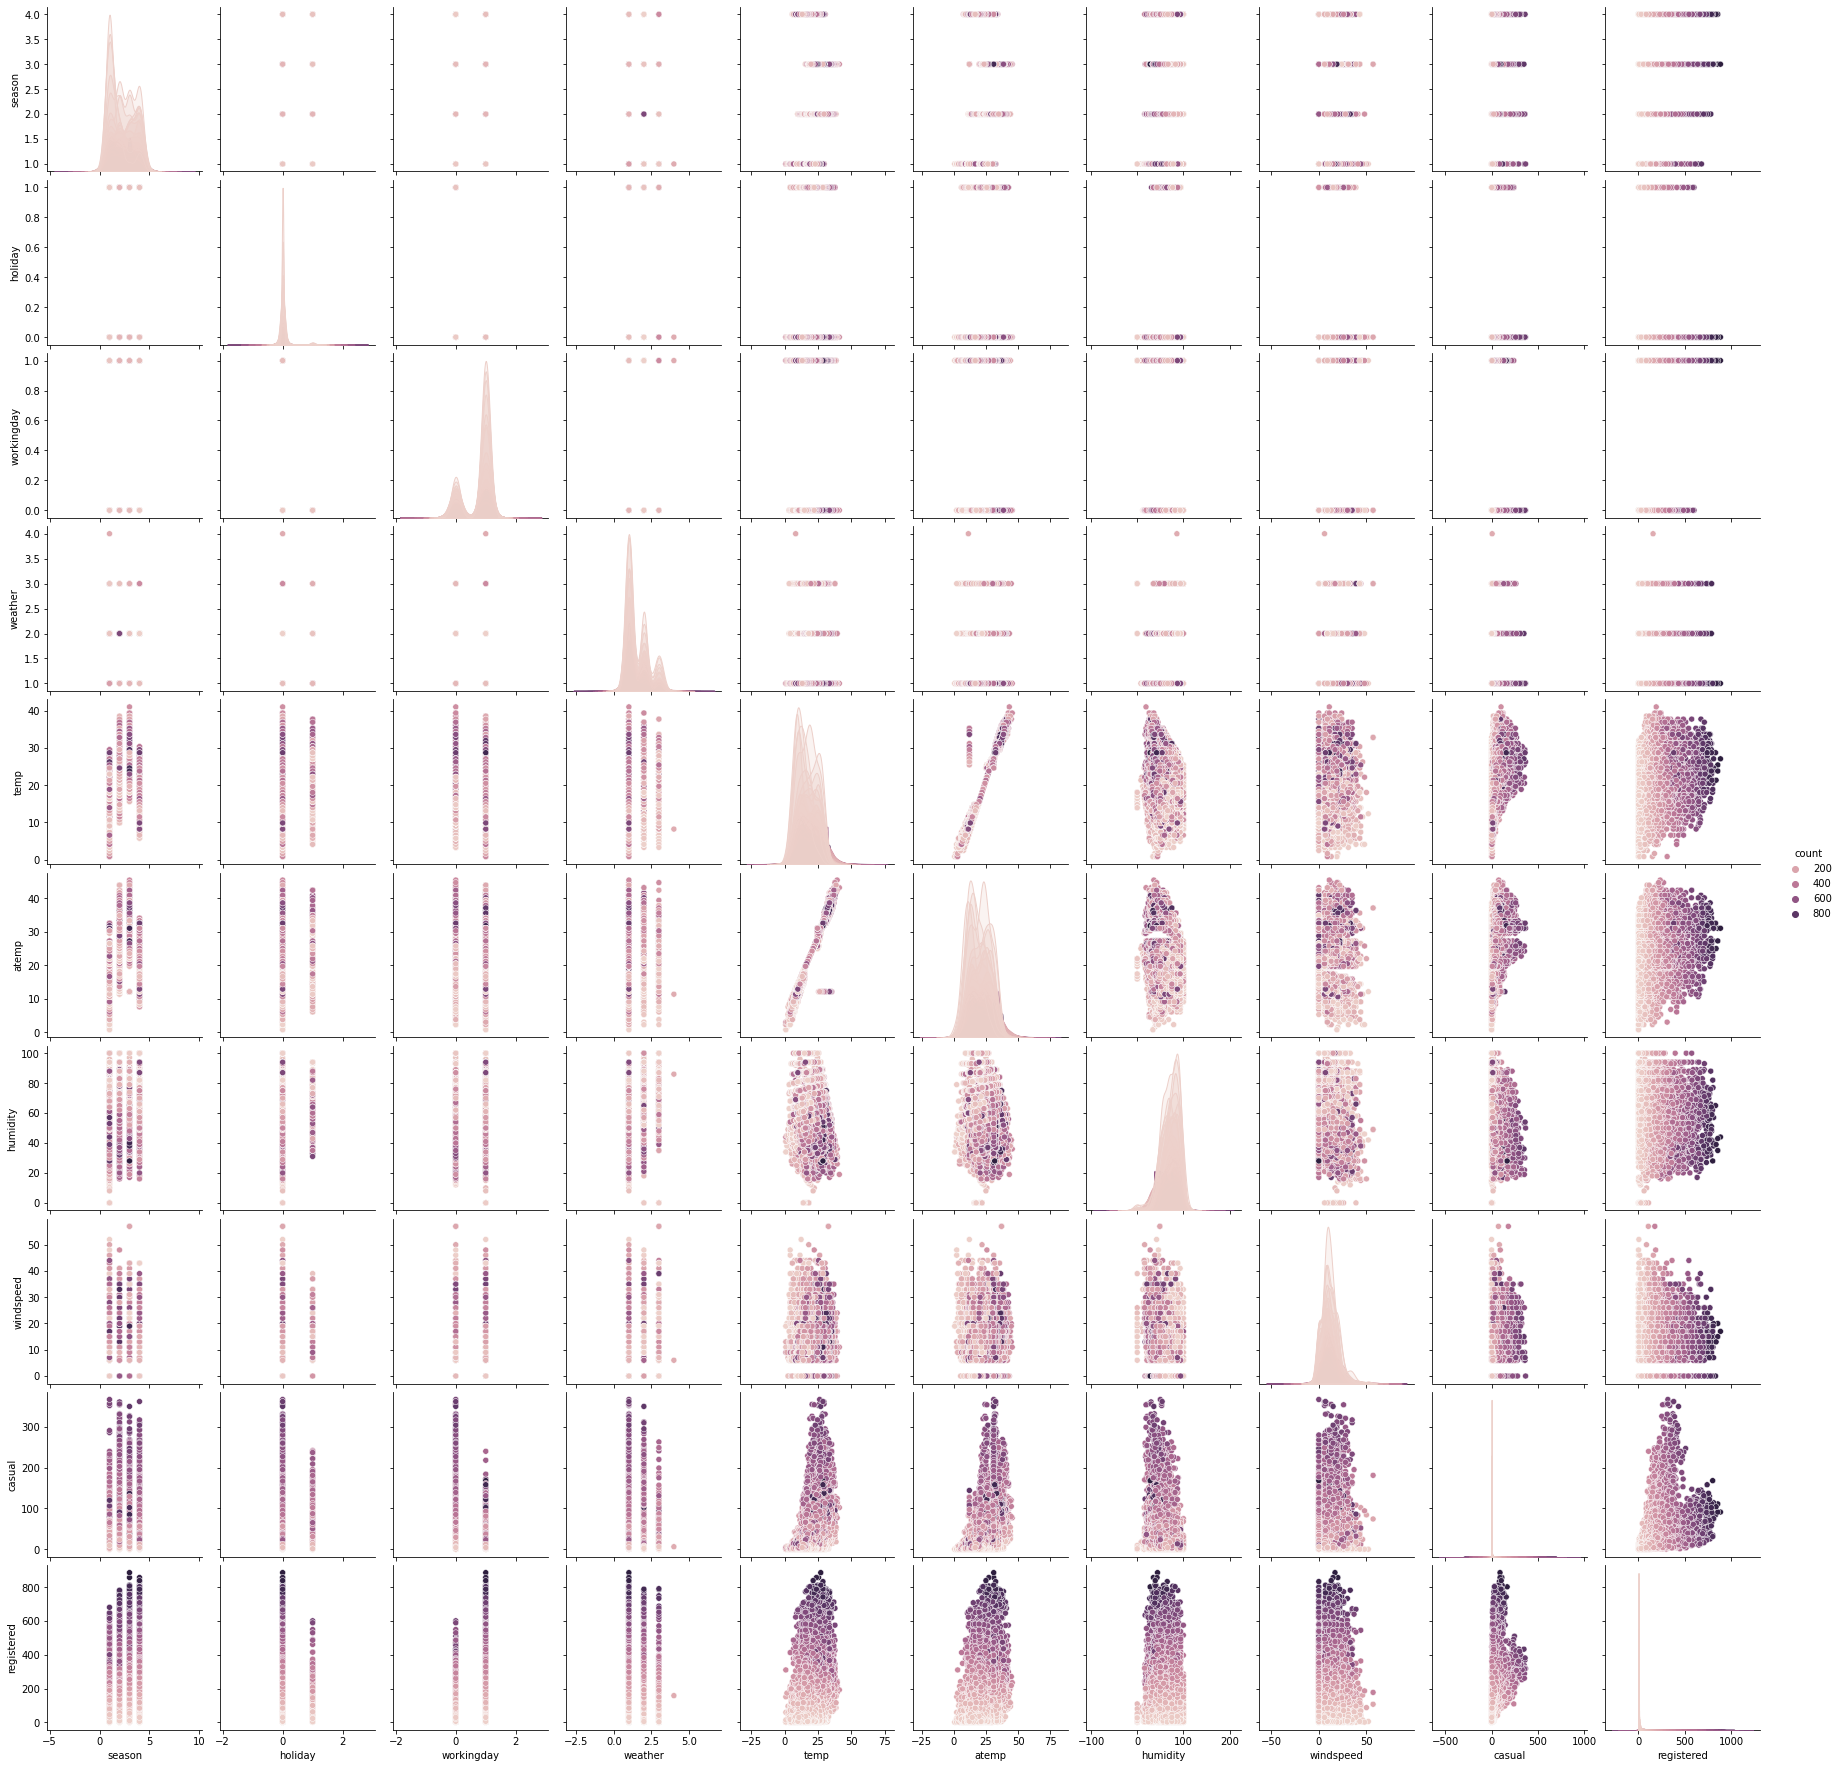

In [16]:
sns.pairplot(hue = 'count', data = DF)
plt.show()

# II. Data Split

In [12]:
X = DF[['season', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'casual', 'registered']]
y = DF['count']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7620, 8) (7620,)
Test Data :  (3266, 8) (3266,)


# III. Multivariate Regression

In [63]:
%%time

from sklearn.linear_model import LinearRegression

MR = LinearRegression(normalize = True,
                      n_jobs = -1)

MR.fit(X_train, y_train)

CPU times: user 5.91 ms, sys: 1.02 ms, total: 6.92 ms
Wall time: 6.27 ms


In [30]:
mse = []

mse_MR = mean_squared_error(y_test, MR.predict(X_test))
mse.append(np.sqrt(mse_MR))

# IV. Ridge Regression

In [27]:
%%time

from sklearn.linear_model import Ridge

RG = Ridge(normalize = True,
           alpha = 0.3,
           solver = 'cholesky')

RG.fit(X_train, y_train)

CPU times: user 7.35 ms, sys: 4.01 ms, total: 11.4 ms
Wall time: 14.6 ms


In [31]:
mse_RG = mean_squared_error(y_test, RG.predict(X_test))
mse.append(np.sqrt(mse_RG))

# V. Lasso Regression

In [33]:
%%time

from sklearn.linear_model import Lasso

LS = Lasso(normalize = True,
           alpha = 0.2)

LS.fit(X_train, y_train)

CPU times: user 2.47 ms, sys: 6.96 ms, total: 9.44 ms
Wall time: 14.1 ms


In [34]:
mse_LS = mean_squared_error(y_test, LS.predict(X_test))
mse.append(np.sqrt(mse_LS))

# VI. ElasticNet Regression

In [35]:
%%time

from sklearn.linear_model import ElasticNet

EN = ElasticNet(normalize = True,
                alpha = 0.001,
                l1_ratio = 0.7)

EN.fit(X_train, y_train)

CPU times: user 7.54 ms, sys: 3.02 ms, total: 10.6 ms
Wall time: 13.9 ms


In [36]:
mse_EN = mean_squared_error(y_test, EN.predict(X_test))
mse.append(np.sqrt(mse_EN))

# VII. Decision Tree Regressor

In [39]:
%%time

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 5,
                            criterion = 'mse')

DTR.fit(X_train, y_train)

CPU times: user 44.4 ms, sys: 6.92 ms, total: 51.3 ms
Wall time: 125 ms


In [40]:
mse_DTR = mean_squared_error(y_test, DTR.predict(X_test))
mse.append(np.sqrt(mse_DTR))

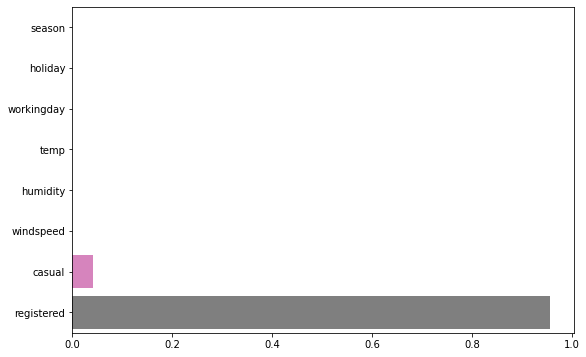

In [41]:
plt.figure(figsize = (9, 6))
sns.barplot(DTR.feature_importances_,
            ['season', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'casual', 'registered'])
plt.show()

# VIII. Random Forest Regressor

In [42]:
%%time

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 2000,
                            max_features = 3,
                            max_depth = 1,
                            criterion = 'mse',
                            n_jobs = -1,
                            random_state = 2045)
RFR.fit(X_train, y_train)

CPU times: user 5.84 s, sys: 315 ms, total: 6.16 s
Wall time: 4.29 s


In [43]:
mse_RFR = mean_squared_error(y_test, RFR.predict(X_test))
mse.append(np.sqrt(mse_RFR))

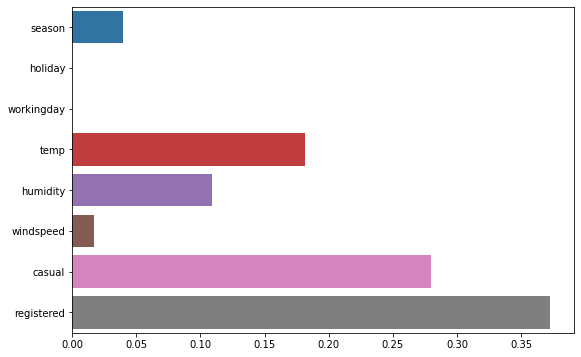

In [44]:
plt.figure(figsize = (9, 6))
sns.barplot(RFR.feature_importances_,
            ['season', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'casual', 'registered'])
plt.show()

# IX. Gradient Boostin Machine(GBM) Classifier

In [45]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(loss = 'ls',
                                n_estimators = 9000,
                                learning_rate = 0.0001,
                                criterion = 'mse',
                                max_features = 3,
                                max_depth = 1)
GBR.fit(X_train, y_train)

CPU times: user 13.3 s, sys: 13 ms, total: 13.3 s
Wall time: 13.4 s


In [46]:
mse_GBR = mean_squared_error(y_test, GBR.predict(X_test))
mse.append(np.sqrt(mse_GBR))

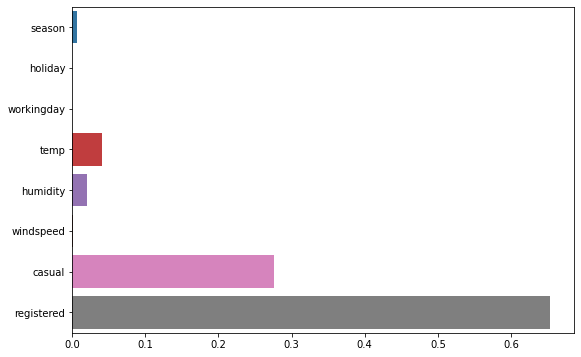

In [47]:
plt.figure(figsize = (9, 6))
sns.barplot(GBR.feature_importances_,
            ['season', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'casual', 'registered'])
plt.show()

# X. Adaptive Boosting Regressor

In [48]:
%%time

from sklearn.ensemble import AdaBoostRegressor

ABR = AdaBoostRegressor(loss = 'square',
                        n_estimators = 500,
                        learning_rate = 0.0001,
                        random_state = 2045)

ABR.fit(X_train, y_train)

CPU times: user 5.59 s, sys: 28.5 ms, total: 5.62 s
Wall time: 5.65 s


In [49]:
mse_ABR = mean_squared_error(y_test, ABR.predict(X_test))
mse.append(np.sqrt(mse_ABR))

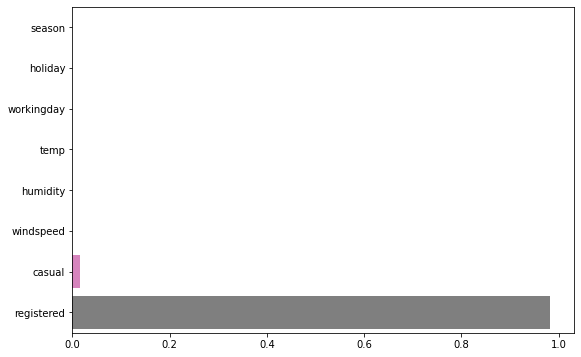

In [50]:
plt.figure(figsize = (9, 6))
sns.barplot(ABR.feature_importances_,
            ['season', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'casual', 'registered'])
plt.show()

# XI.eXtra Gradient Boost(XGBoost) Classifier

In [51]:
%%time

from xgboost import XGBRegressor

XGB = XGBRegressor(booster = 'gblinear',
                   n_estimators = 100,
                   learining_rate = 0.4,
                   reg_lambda = 2.0,
                   n_jobs = -1)

XGB.fit(X_train, y_train)

[06:16:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 327 ms, sys: 21 ms, total: 348 ms
Wall time: 346 ms


In [53]:
mse_XGB = mean_squared_error(y_test, XGB.predict(X_test))
mse.append(np.sqrt(mse_XGB))

# XII. LightGBM Regressor

In [54]:
%%time

from lightgbm import LGBMRegressor

LGB = LGBMRegressor(linear_tree = True,
                    boosting_type = 'gbdt',
                    n_estimators = 500,
                    learning_rate = 0.001,
                    max_depth = 2,
                    n_jobs = -1)

LGB.fit(X_train, y_train)

CPU times: user 352 ms, sys: 15.9 ms, total: 368 ms
Wall time: 233 ms


In [55]:
mse_LGB = mean_squared_error(y_test, LGB.predict(X_test))
mse.append(np.sqrt(mse_LGB))

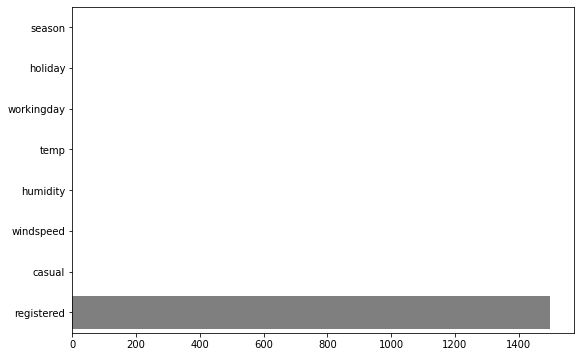

In [56]:
plt.figure(figsize = (9, 6))
sns.barplot(LGB.feature_importances_,
            ['season', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'casual', 'registered'])
plt.show()

# XIII. np.sqrt(mse) 비교

In [58]:
print(mse)

[2.7269455842660994e-13, 35.96633964542299, 19.831470700885376, 108.67168685780265, 24.077663007715394, 117.49681467778255, 132.0229739290078, 43.392643913337245, 5.888044049884731, 119.21604153822729]


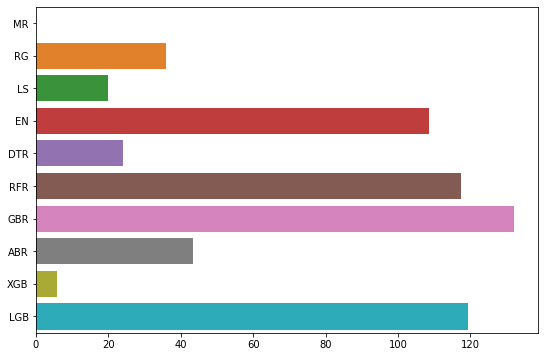

In [62]:
plt.figure(figsize = (9, 6))
sns.barplot(mse,
            ['MR', 'RG', 'LS', 'EN', 'DTR', 'RFR', 'GBR', 'ABR', 'XGB', 'LGB'])
plt.show()